In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
depth = xr.open_dataset('D:/MScData/depth_res.nc')
od = ospy.OceanDataset(depth)
depth = depth['Depth']

In [3]:
depth = depth.where(depth>0,np.nan)
depth_r = depth.rolling(X=10, center=True).mean()
depth_r = depth.rolling(Y=10, center=True).mean()

In [4]:
north_zonal = depth.sel(Y=78.5,method='nearest').sel(X=slice(-20,11)).dropna(dim="X")
north_zonal_moor = depth.sel(Y=78.5,method='nearest').sel(X=slice(0.3,8)).dropna(dim="X")


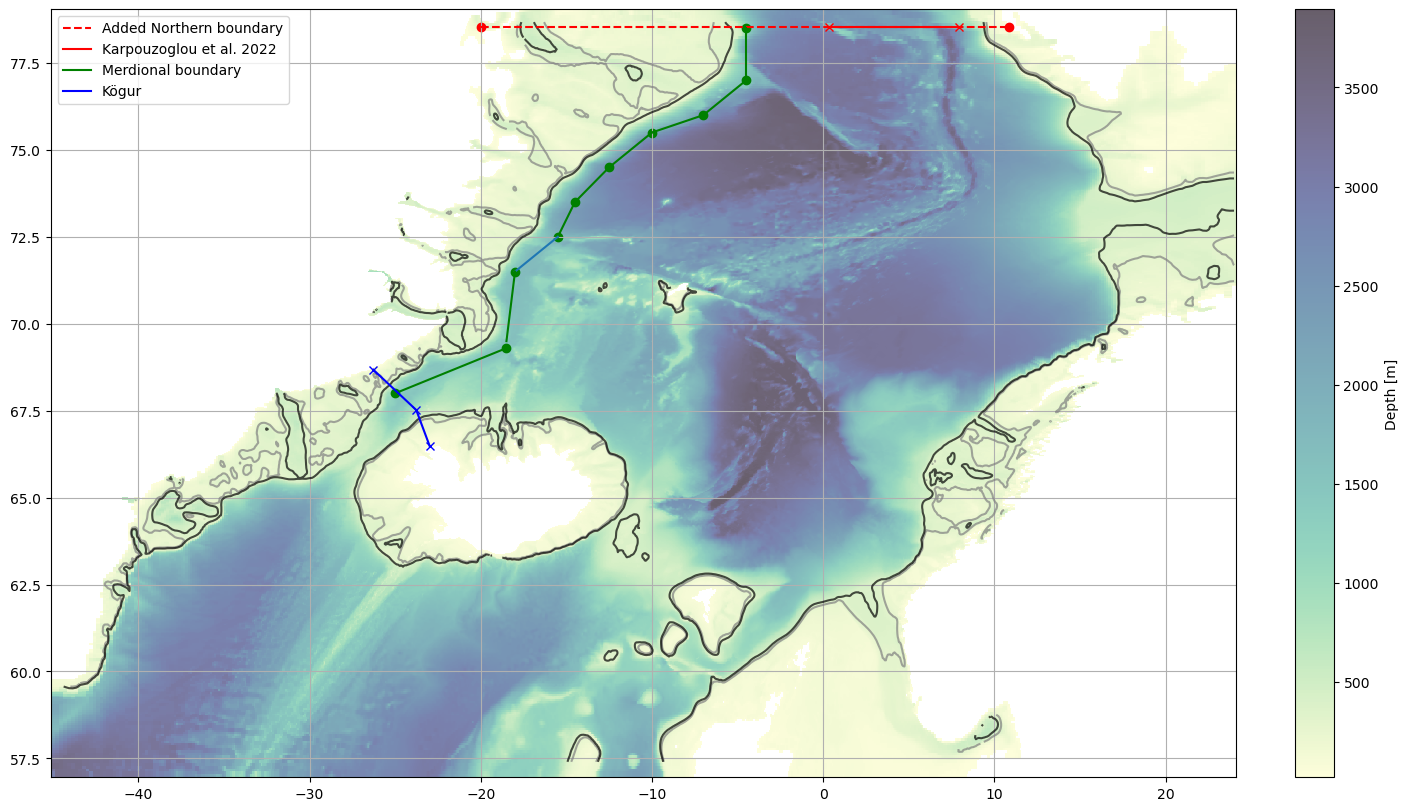

In [5]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
ax.scatter(-4.5,78.5,color='g')
ax.scatter(-4.5,77,color='g')
ax.plot([-4.5,-4.5],[78.5,77],color='g',label='Merdional boundary')
ax.scatter(-7,76,color='g')
ax.plot([-4.5,-7],[77,76],'g')
ax.scatter(-10,75.5,color='g')
ax.plot([-7,-10],[76,75.5],'g')
ax.scatter(-12.5,74.5,color='g')
ax.plot([-10,-12.5],[75.5,74.5],'g')
ax.scatter(-14.5,73.5,color='g')
ax.plot([-12.5,-14.5],[74.5,73.5],'g')
ax.scatter(-15.5,72.5,color='g')
ax.plot([-14.5,-15.5],[73.5,72.5],'g')
ax.scatter(-18,71.5,color='g')
ax.plot([-15.5,-18],[72.5,71.5])
ax.scatter(-18.5,69.3,color='g')
ax.plot([-18,-18.5],[71.5,69.5],'g')
ax.scatter(-25,68,color='g')
ax.plot([-18.5,-25],[69.3,68],'g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()

In [6]:
# coords = depth.sel(X=slice(-30,-22)).sel(Y=slice(65,70))
# fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
# mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Depth [m]')
# ax.grid()

# ax.set_xlim(coords.X[0],coords.X[-1])
# ax.set_ylim(coords.Y[0],coords.Y[-1])

In [7]:
# DS_section = od.subsample.mooring_array(Ymoor=[66,69],Xmoor=[-24,-25.5])

In [44]:
depth_s = xr.open_dataset('D:/MScData/depth_res.nc')['Depth']
# Add nan where depth = 0
depth_s = depth.where(depth>0,np.nan)

# Smooth the data with rolling of window size 9 in both lat/lon direction
depth_s = depth_s.rolling(X=5, center=True).mean().rolling(Y=5, center=True).mean()

# Selecting spesific domain and removing outliers
depth_s = depth_s.sel(Y=slice(67.5,78.5)).sel(X=slice(-26,-5))
condition = ((-20<=depth_s.X) & (depth_s.X<=-9)) & ((77<=depth_s.Y) & (depth_s.Y<=78.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-20<=depth_s.X) & (depth_s.X<=-15)) & ((75<=depth_s.Y) & (depth_s.Y<=77.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-15<=depth_s.X) & (depth_s.X<=0)) & ((70<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-18)) & ((73<=depth_s.Y) & (depth_s.Y<=75))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((72<=depth_s.Y) & (depth_s.Y<=73))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((71.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((69.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-15)) & ((67<=depth_s.Y) & (depth_s.Y<=68))
depth_s = depth_s.where(~condition, other=0)
condition = ((-22<=depth_s.X) & (depth_s.X<=-20)) & ((69.25<=depth_s.Y) & (depth_s.Y<=69.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-24)) & ((68.75<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)
condition = ((-21.25<=depth_s.X) & (depth_s.X<=-21)) & ((69.2<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)


# Adjust mask for small tolerance around the desired range
desired_lower = 395
desired_upper = 405
tolerance = 0.01  # Adjust as necessary based on actual distribution seen

mask = (depth_s > desired_lower - tolerance) & (depth_s < desired_upper + tolerance)

# Drop NaNs
positions = mask.where(mask, drop=True)

# Verify mask summary
print("\nMask Summary (True values count) after adding tolerance:", np.sum(mask.values))


# Extract coordinates of the matching positions
coordinates = []
for y_coord in positions['Y'].values:
    for x_coord in positions['X'].values:
        if mask.sel(Y=y_coord, X=x_coord).values:
            coordinates.append((x_coord, y_coord))



Mask Summary (True values count) after adding tolerance: 154


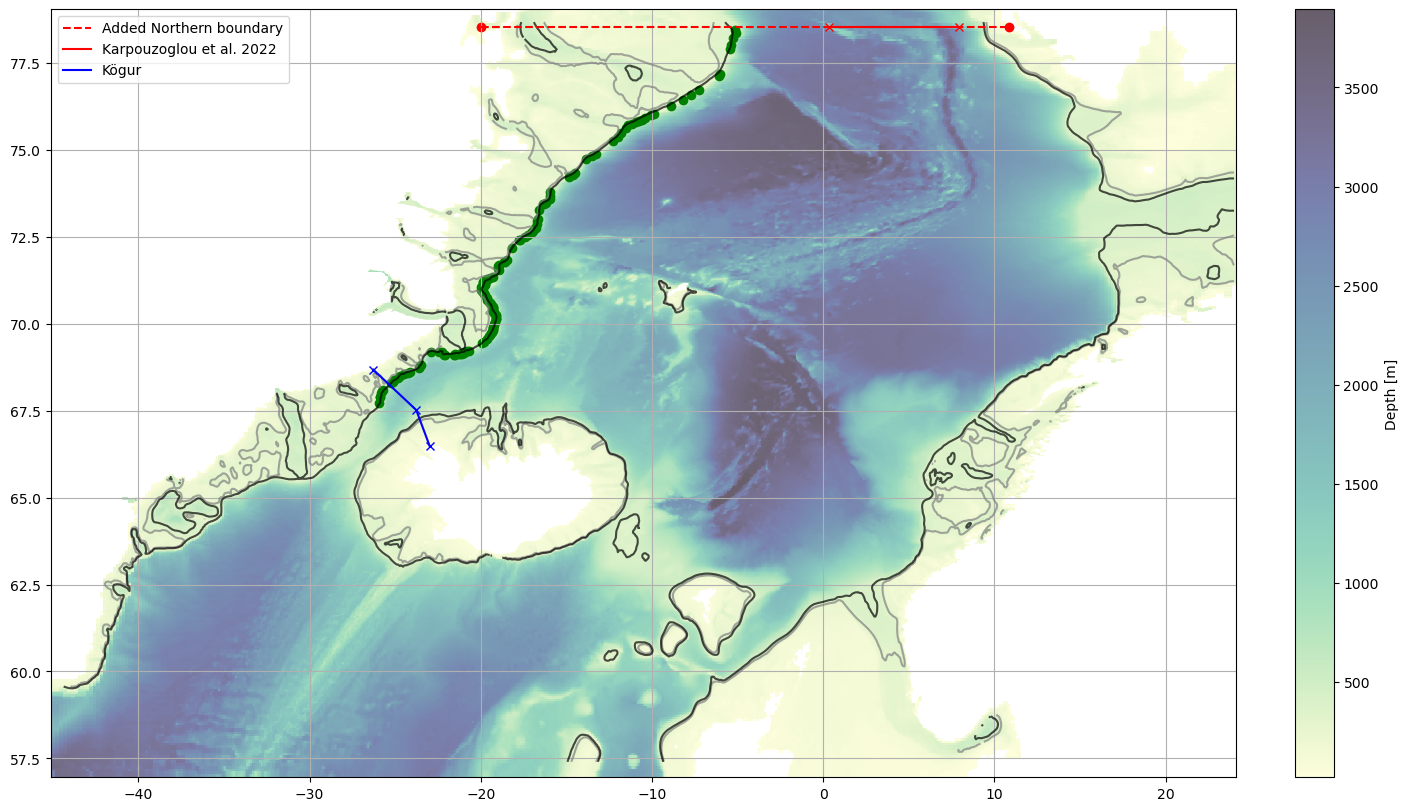

In [45]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
for i in coordinates:
    ax.scatter(i[0],i[1],color='g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()